In [1]:
import pandas as pd

In [15]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631


In [16]:
confirmed.shape

(274, 443)

In [17]:
confirmed['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
269               Vietnam
270    West Bank and Gaza
271                 Yemen
272                Zambia
273              Zimbabwe
Name: Country/Region, Length: 274, dtype: object

In [22]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [19]:
last_date='4/4/21'
confirmed[last_date]

0       56676
1      126531
2      117622
3       12231
4       22631
        ...  
269      2631
270    251288
271      4798
272     88930
273     36923
Name: 4/4/21, Length: 274, dtype: int64

In [23]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
3/31/21                 56454
4/1/21                  56517
4/2/21                  56572
4/3/21                  56595
4/4/21                  56676
Name: 0, Length: 443, dtype: object

In [26]:
confirmed.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
3/31/21               994
4/1/21                994
4/2/21                994
4/3/21                994
4/4/21                994
Name: Anhui, Length: 442, dtype: object

In [27]:
confirmed['Country/Region'].value_counts()

China               33
Canada              16
United Kingdom      12
France              12
Australia            8
                    ..
Indonesia            1
North Macedonia      1
Congo (Kinshasa)     1
Chile                1
Iceland              1
Name: Country/Region, Length: 192, dtype: int64

In [29]:
confirmed_country = confirmed.groupby('Country/Region').sum()
confirmed_country

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2412,2421,2426,2432,2448,2448,2475,2482,2488,2494,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,177768,179293,180848,181909,183612,185336,187309,189326,191203,193029,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2221,2255,2267,2269,2285,2310,2342,2363,2375,2411,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798


In [30]:
confirmed_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Belize,17.189900,-88.49760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12271,12280,12293,12293,12293,12313,12320,12328,12329,12335,12335,12335,12335,12345,12355,12359,12370,12370,12370,12383,12389,12396,12399,12400,12400,12400,12407,12410,12410,12411,12415,12415,12415,12415,12415,12456,12456,12456,12456,12456
Rwanda,-1.940300,29.87390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18443,18553,18689,18790,18850,18986,19111,19198,19334,19426,19509,19551,19659,19779,19846,19945,20057,20143,20186,20302,20412,20480,20551,20681,20761,20828,20896,20975,21106,21210,21309,21370,21419,21490,21645,21783,21918,22167,22243,22482
Montenegro,42.708678,19.37439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,73612,74183,74789,75332,75834,76283,76868,77493,78060,78634,79237,79774,80191,80803,81457,82029,82610,83165,83693,84163,84700,85253,85774,86282,86782,87212,87638,88116,88550,88991,89363,89732,90083,90418,90832,91218,91573,91906,92222,92519
Papua New Guinea,-6.314993,143.95555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1139,1228,1228,1275,1275,1365,1365,1365,1365,1492,1492,1583,1670,1741,1741,1819,1819,1819,2173,2269,2351,2351,2479,2658,3085,3085,3359,3758,4109,4109,4660,4660,5184,5349,5620,5991,6112,6475,6619,7038
Jordan,31.240000,36.51000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,376441,380268,383912,386496,391090,397158,402282,407617,413350,417934,421415,427717,435130,442202,448851,457151,464856,469000,477053,486470,495380,504915,514107,521461,526666,535455,544724,553727,562857,571290,577734,582133,589316,597256,605007,611577,618059,622833,626875,632907
Solomon Islands,-9.645700,160.15620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19
Romania,45.943200,24.96680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,...,788048,791971,795732,799164,801994,804090,808040,812318,816589,820931,824995,828283,830563,835552,840116,845352,850362,855326,859709,862681,868799,874985,881159,886752,892848,897115,900858,907007,913143,919794,926310,932179,936618,940443,946647,952803,958918,964726,970224,974375
Nigeria,9.082000,8.67530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,153842,154476,155076,155417,155657,156017,156496,156960,157671,158042,158237,158506,158906,159252,159646,159933,160332,160537,160657,160895,161074,161261,161409,161539,161651,161737,161868,162076,162178,162275,162388,162489,162593,162641,162762,162891,162997,163063,163113,163195
Guinea-Bissau,11.803700,-15.18040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3171,3215,3241,3247,3262,3262,3271,3282,3301,3303,3312,3312,3312,3319,3327,3380,3398,3436,3447,3447,3469,3488,3518,3536,3558,3568,3568,3586,3591,3607,3615,3630,3634,3634,3647,3650,3661,3661,3661,3662


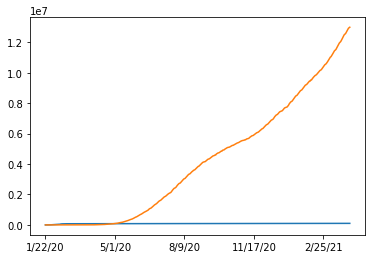

In [37]:
confirmed_country.loc['China'][2:].plot()
confirmed_country.loc['Brazil'][2:].plot()

In [39]:
import matplotlib.pyplot as plt

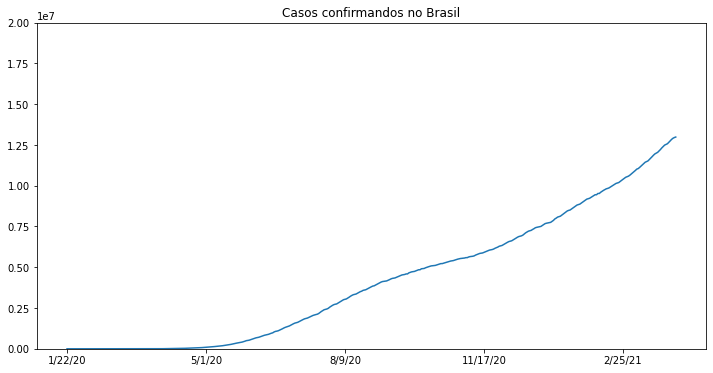

In [45]:
plt.figure(figsize=(12,6))
confirmed_country.loc['Brazil'][2:].plot()
plt.title('Casos confirmandos no Brasil')
plt.ylim(0, 20000000)
plt.show()

In [46]:
confirmed_country.loc['Brazil'][2:].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
3/31/21    90638.0
4/1/21     91097.0
4/2/21     70238.0
4/3/21     43515.0
4/4/21     31359.0
Name: Brazil, Length: 439, dtype: float64

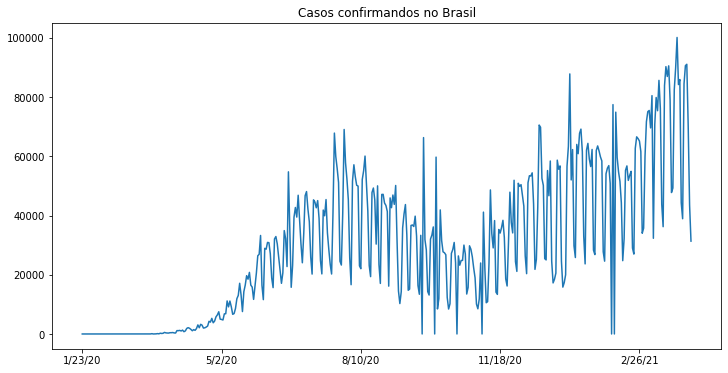

In [50]:
plt.figure(figsize=(12,6))
confirmed_country.loc['Brazil'][2:].diff().dropna().plot()
plt.title('Casos confirmandos no Brasil')
plt.show()

In [51]:
confirmed_country[last_date]

Country/Region
Afghanistan            56676
Albania               126531
Algeria               117622
Andorra                12231
Angola                 22631
                       ...  
Vietnam                 2631
West Bank and Gaza    251288
Yemen                   4798
Zambia                 88930
Zimbabwe               36923
Name: 4/4/21, Length: 192, dtype: int64

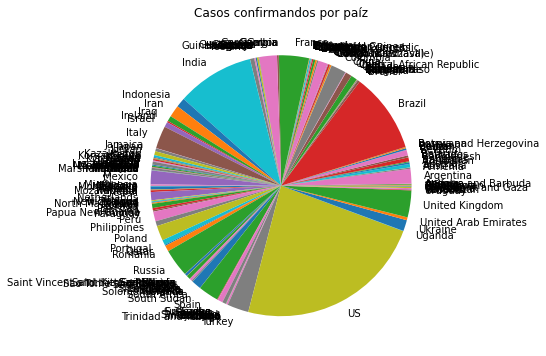

In [55]:
plt.figure(figsize=(12,6))
confirmed_country[last_date].dropna().plot(kind='pie')
plt.title('Casos confirmandos por país')
plt.show()

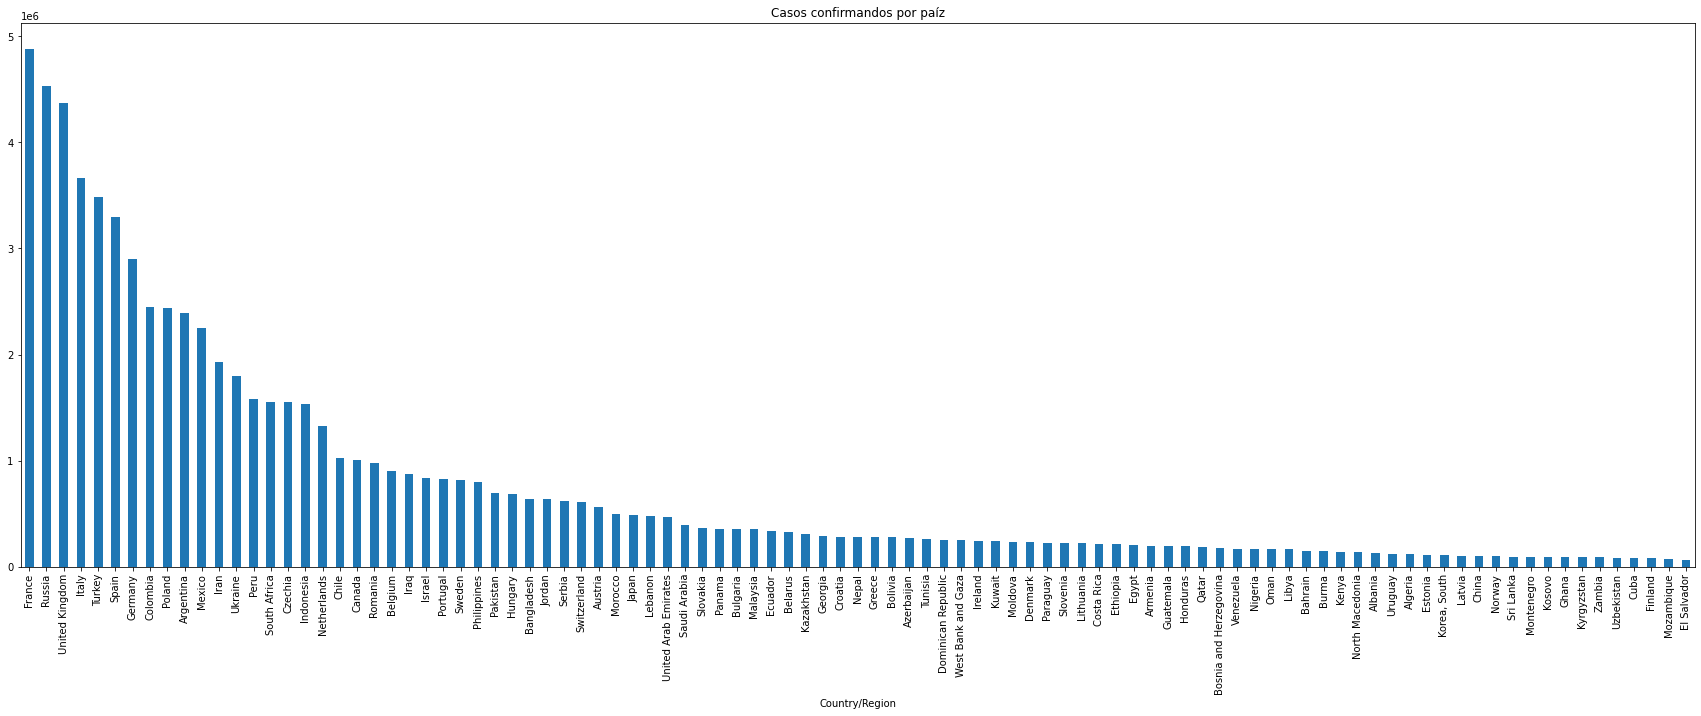

In [63]:
plt.figure(figsize=(30,10))
confirmed_country[last_date].dropna().sort_values(ascending=False)[3:100].plot(kind='bar')
plt.title('Casos confirmandos por paíz')
plt.show()